In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from datetime import datetime
%matplotlib inline

## Аннотация

## Введение

## Подготовка данных

In [2]:
initial_pubs = pd.read_excel('armenian_pubs.xlsx', sheet_name='Данные')
initial_pubs.info()
# видим что у timestamp тип object. 
# Так как возможно мы будем работать с этим полем,
# лучше распарсить его как дату

# Название у колонн начинается на заглавные буквы 
# и могут заканчиваться пробелмами. 
# Это не удобно, лучше обращаться к атрибутам 
# без заглавных букв - будет меньше ошибок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          175 non-null    int64  
 1   Gender       175 non-null    object 
 2   Income       174 non-null    float64
 3    Occupation  175 non-null    object 
 4   Fav_Pub      168 non-null    object 
 5   WTS          172 non-null    float64
 6   Freq         175 non-null    object 
 7   Prim_Imp     175 non-null    object 
 8   Sec_Imp      175 non-null    object 
 9   Stratum      175 non-null    object 
 10  Lifestyle    169 non-null    object 
 11  Occasions    173 non-null    object 
 12  Timestamp    175 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 17.9+ KB


In [3]:
initial_pubs = pd.read_excel('armenian_pubs.xlsx', sheet_name='Данные',
                        parse_dates=['Timestamp'])
initial_pubs.rename(str.lower, axis='columns', inplace=True)
initial_pubs.rename(str.strip, axis='columns', inplace=True)
initial_pubs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype                                 
---  ------      --------------  -----                                 
 0   age         175 non-null    int64                                 
 1   gender      175 non-null    object                                
 2   income      174 non-null    float64                               
 3   occupation  175 non-null    object                                
 4   fav_pub     168 non-null    object                                
 5   wts         172 non-null    float64                               
 6   freq        175 non-null    object                                
 7   prim_imp    175 non-null    object                                
 8   sec_imp     175 non-null    object                                
 9   stratum     175 non-null    object                                
 10  lifestyle   169 non-null  

In [15]:
# опечатка
initial_pubs[(initial_pubs.occasions.str.lower() == 'nowere')]

,age,gender,income,occupation,fav_pub,wts,freq,prim_imp,sec_imp,stratum,lifestyle,occasions,timestamp
77,18,Female,270000.0,Student,I don't like pubs,0.0,rarely (once two week/or a month),Environment,Pricing,Urban,"Busy(student life, work)",Nowere,2017-02-26 01:33:20-04:00


In [5]:
# Стоит ли убрать тех, кто ответил, «I don't like pubs» в Fav_Pub, и тех, кто в Occasions ответил nowhere, never? По факту нафиг они нужны, но почему-то бары они все равно посещают. Хз, наверное стоит и оставить
pubs = initial_pubs[~initial_pubs.fav_pub.isin(['I don\'t like pubs',])]
pubs = pubs[~(pubs.occasions.isin(['Nowere', 'Never']))]

In [16]:
def plot_series(series, title, xlabel, ylabel, figsize=(12,5), color=None, label=None):
    ax = series.plot(title=title, xlabel=xlabel, ylabel=ylabel, figsize=figsize, color=color, label=label)
    return ax

## Анализ

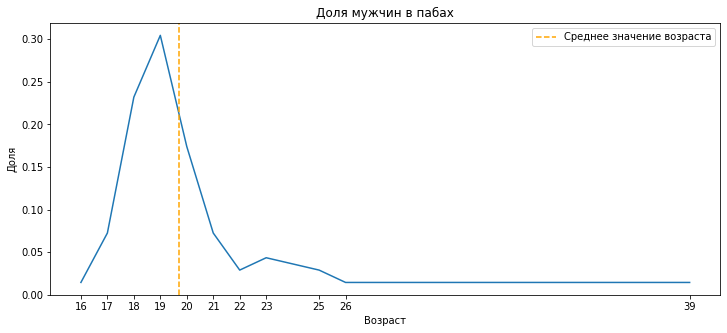

Популярный возраст: 19, средний возраст: 19.72463768115942


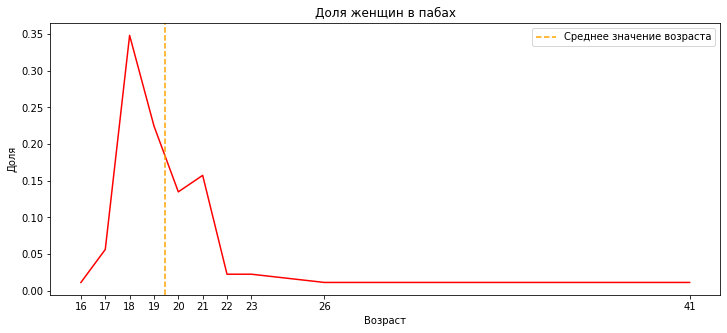

Популярный возраст: 18, средний возраст: 19.43820224719101


In [7]:
# Построить график, на котором будут указаны доля мужчин и женщин и их распределение по Age. Можно даже средний возраст у них выделить (по всем примерно 19, 5 должен быть). Делаем вывод, кто у нас больше всего по пабам шатается. Даже можно портрет среднестатистического посетителя написать тут 

men_pubs = pubs[pubs.gender == 'Male']
women_pubs = pubs[pubs.gender == 'Female']

men_ages = men_pubs.groupby('age').size() / men_pubs.__len__()
men_mean_age = men_pubs.age.mean()
men_mode_age = men_pubs.age.mode()[0]

women_ages = women_pubs.groupby('age').size() / women_pubs.__len__()
women_mean_age = women_pubs.age.mean()
women_mode_age = women_pubs.age.mode()[0]

men_ax = plot_series(men_ages, 'Доля мужчин в пабах', 'Возраст', 'Доля')
l = men_ax.axvline(men_mean_age, ls='--', color='orange')
men_ax.legend((l,), ('Среднее значение возраста',))
men_ax.set_xticks(men_ages.index)
plt.show()
print(f'Популярный возраст: {men_mode_age}, средний возраст: {men_mean_age}')

women_ax = plot_series(women_ages, 'Доля женщин в пабах', 'Возраст', 'Доля', color='red')
l = women_ax.axvline(women_mean_age, ls='--', color='orange')
women_ax.legend((l,), ('Среднее значение возраста',))
women_ax.set_xticks(women_ages.index)
plt.show()
print(f'Популярный возраст: {women_mode_age}, средний возраст: {women_mean_age}')
#plt.hlines()

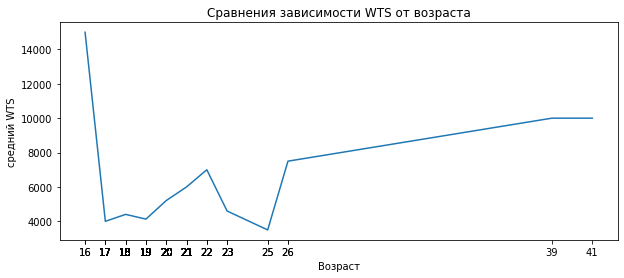

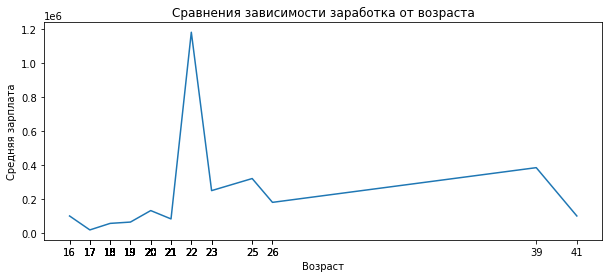

In [8]:
#3) (тут не совсем уверена, что получится сделать качественный вывод)
# 1. Строим график по тому, кто сколько тратит денег в пабе (WTS ) (по возрасту, я думаю). 
# 2. Строим график по Income, тоже смотрим по возрасту 
# 3. Делаем выводы, есть ли зависимость какая-то 

ax = plot_series(
    pubs.groupby('age').wts.mean(),
    'Сравнения зависимости WTS от возраста',
    'Возраст',
    'средний WTS',
    figsize=(10, 4),
    )
ax.set_xticks(pubs.age)
plt.show()
ax = plot_series(
    pubs.groupby('age').income.mean(),
    'Сравнения зависимости заработка от возраста',
    'Возраст',
    'Средняя зарплата',
    figsize=(10, 4),
)
ax.set_xticks(pubs.age)
plt.show()

In [9]:
pubs.groupby('freq').wts.mean()

freq
Several times a week                 5975.0
Several times in a month             4000.0
rarely (once two week/or a month)    5420.0
Name: wts, dtype: float64

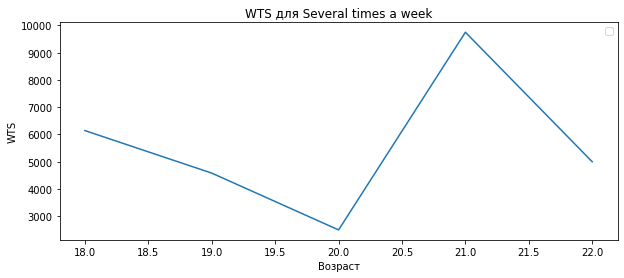

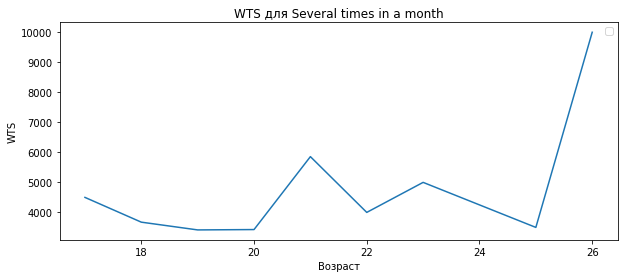

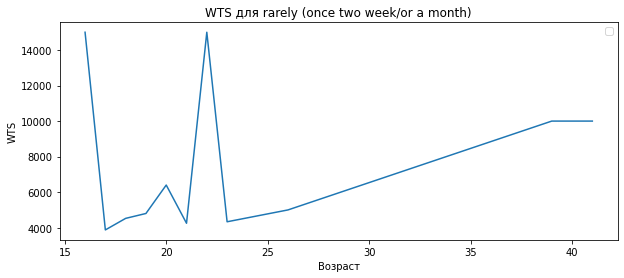

In [10]:
# 4) Построить график, где будет зависимость между тем, сколько денег тратит человек в пабе и насколько часто он его посещает (Freq). Делаем вывод 
a = pubs.groupby(['freq', 'age'])[['wts']].mean()
axs = a.reset_index().groupby('freq').plot(x='age', y='wts', figsize=(10, 4))

for title in axs.index:
    ax = axs[title]
    ax.set_title('WTS для ' + title)
    ax.set_xlabel('Возраст')
    ax.set_ylabel('WTS')
    ax.legend('')

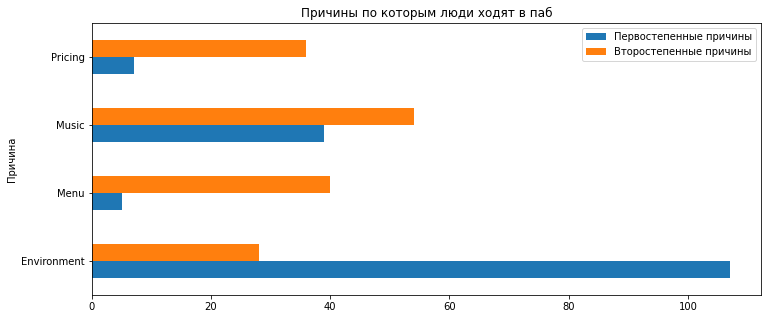

In [11]:
# 5) Выводим рейтинги причин, по которым респондент посещает паб (первостепенную и второстепенную). Типа две гистограммы

imp = pubs.groupby('prim_imp').size().to_frame('Первостепенные причины')
imp['Второстепенные причины'] = pubs.groupby('sec_imp').size().values
imp.index = imp.index.rename('imp_name')
imp.plot.barh(title='Причины по которым люди ходят в паб', xlabel='Причина', figsize=(12,5))
plt.show()

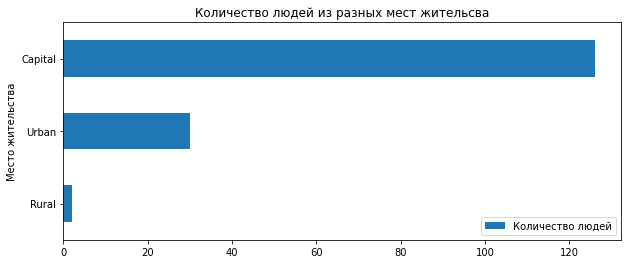

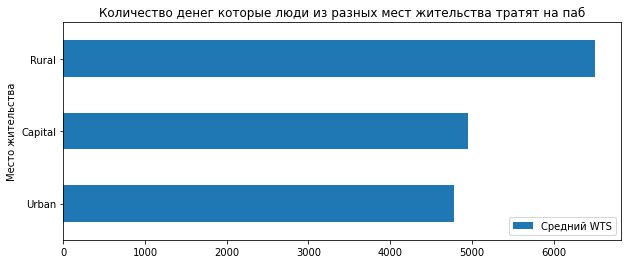

In [20]:
# 6) Поделить всех людей на тех, кто из города и Urban. Построить графики:
# 1. где показано, насколько часто люди из сити посещают пабы и для урбан то же самое
# 2. Где показано сколько денег тратит каждая категория
# 3. Вывод 
pubs.groupby('stratum').size().sort_values().plot.barh(title='Количество людей из разных мест жительсва', xlabel='Место жительства', legend=True, figsize=(10, 4))
plt.legend(['Количество людей'])
plt.show()

pubs.groupby('stratum')['wts'].mean().sort_values().plot.barh(title='Количество денег которые люди из разных мест жительства тратят на паб', xlabel='Место жительства', legend=True, figsize=(10, 4))
plt.legend(['Средний WTS'])
plt.show()

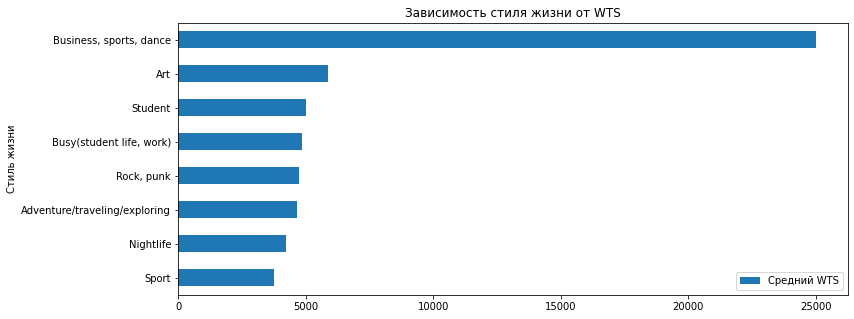

In [13]:
# 7) В последнем показать зависимость между образом жизни чела и сколько он тратится в пабе (если еще здесь же можно отобразить, как часто он ходит в паб, то просто сказка).
#fig, (ax1, ax2) = plt.subplots(2,1)

pubs.groupby('lifestyle').wts.mean().sort_values().plot.barh(
    title='Зависимость стиля жизни от WTS',
    xlabel='Стиль жизни',
    label='Средний WTS',
    figsize=(12,5),
    )
    
plt.legend()
plt.show()

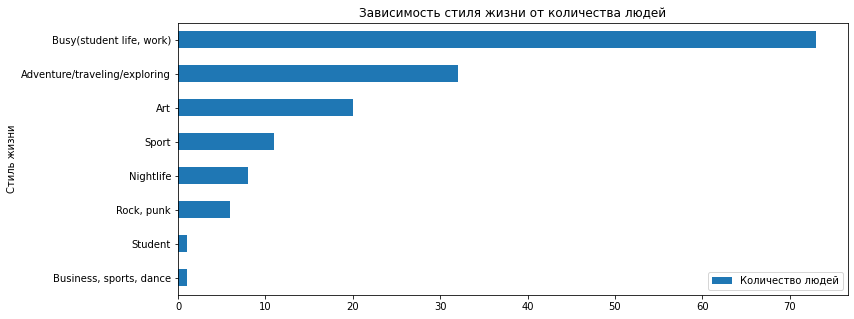

In [14]:
pubs.groupby('lifestyle').size().sort_values().plot.barh(
    title='Зависимость стиля жизни от количества людей',
    xlabel='Стиль жизни',
    label='Количество людей',
    figsize=(12,5),
    )
plt.legend()
plt.show()

## Вывод
